<a href="https://colab.research.google.com/github/Arnob-Mitra/Advanced-Time-Series-Analysis-for-Cryptocurrency-Investment-using-Machine-Learning-Techniques/blob/main/Data_analysis_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Es-Di-Bee/Crypto-Investment-Analysis.git

Cloning into 'Crypto-Investment-Analysis'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 38 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (38/38), done.


In [ ]:
import os #directory fix korar jonno
directory = "/content/Crypto-Investment-Analysis/Dataset"
os.chdir(directory)

In [ ]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
df = pd.read_csv('coin_Bitcoin.csv', parse_dates=['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        2991 non-null   int64         
 1   Name       2991 non-null   object        
 2   Symbol     2991 non-null   object        
 3   Date       2991 non-null   datetime64[ns]
 4   High       2991 non-null   float64       
 5   Low        2991 non-null   float64       
 6   Open       2991 non-null   float64       
 7   Close      2991 non-null   float64       
 8   Volume     2991 non-null   float64       
 9   Marketcap  2991 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 233.8+ KB


# Selecting Volume and Date 

In [ ]:
df = df.drop(['SNo',	'Name',	'Symbol',	'High',	'Low'	,'Open',	'Close',	'Marketcap'], axis = 1)
df

,Date,Volume
0,2013-04-29 23:59:59,0.000000e+00
1,2013-04-30 23:59:59,0.000000e+00
2,2013-05-01 23:59:59,0.000000e+00
3,2013-05-02 23:59:59,0.000000e+00
4,2013-05-03 23:59:59,0.000000e+00
...,...,...
2986,2021-07-02 23:59:59,3.872897e+10
2987,2021-07-03 23:59:59,2.438396e+10
2988,2021-07-04 23:59:59,2.492431e+10
2989,2021-07-05 23:59:59,2.672155e+10


In [ ]:
df=df.groupby('Date').sum()
print(df)

                           Volume
Date                             
2013-04-29 23:59:59  0.000000e+00
2013-04-30 23:59:59  0.000000e+00
2013-05-01 23:59:59  0.000000e+00
2013-05-02 23:59:59  0.000000e+00
2013-05-03 23:59:59  0.000000e+00
...                           ...
2021-07-02 23:59:59  3.872897e+10
2021-07-03 23:59:59  2.438396e+10
2021-07-04 23:59:59  2.492431e+10
2021-07-05 23:59:59  2.672155e+10
2021-07-06 23:59:59  2.650126e+10

[2991 rows x 1 columns]


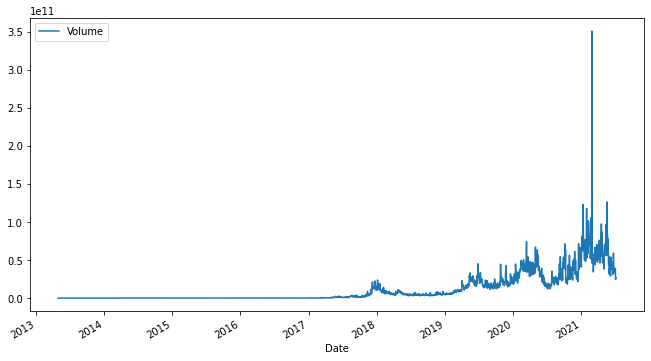

In [ ]:
df.plot(figsize=(11, 6))

# **For Time series**

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

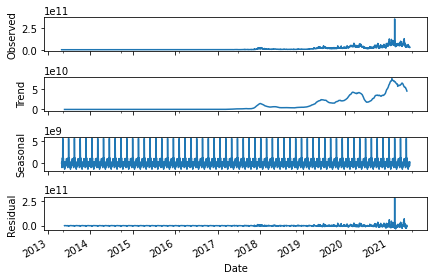

In [ ]:
seasonal_decompose(df, model='additive',freq=50).plot();

# **Holt-Winters Trend**

In [ ]:
h_model=ExponentialSmoothing(df.Volume,trend='add', seasonal='add', seasonal_periods=80).fit()
#model = ExponentialSmoothing(endog = df.Volume, trend = "add",seasonal = "add", seasonal_periods =20).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [ ]:
predictions = h_model.forecast(1000)

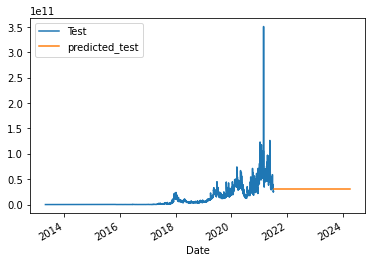

In [ ]:
df['Volume'].plot(legend=True, label='Test')
predictions.plot(legend=True, label='predicted_test')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


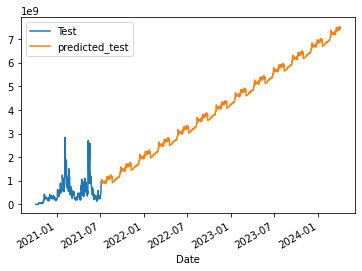

In [ ]:
df = pd.read_csv('coin_Aave.csv', parse_dates=['Date'])
df = df.drop(['SNo',	'Name',	'Symbol',	'High',	'Low'	,'Open',	'Close',	'Marketcap'], axis = 1)
df=df.groupby('Date').sum()
h_model=ExponentialSmoothing(df.Volume,trend='add', seasonal='add', seasonal_periods=80).fit()
predictions = h_model.forecast(steps =1000)
df['Volume'].plot(legend=True, label='Test')
predictions.plot(legend=True, label='predicted_test')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


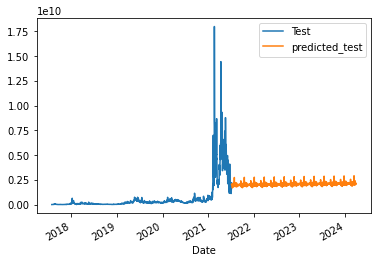

In [ ]:
df = pd.read_csv('coin_BinanceCoin.csv', parse_dates=['Date'])
df = df.drop(['SNo',	'Name',	'Symbol',	'High',	'Low'	,'Open',	'Close',	'Marketcap'], axis = 1)
df=df.groupby('Date').sum()
h_model=ExponentialSmoothing(df.Volume,trend='add', seasonal='add', seasonal_periods=80).fit()
predictions = h_model.forecast(steps =1000)
df['Volume'].plot(legend=True, label='Test')
predictions.plot(legend=True, label='predicted_test')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


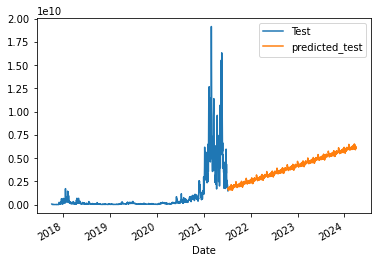

In [ ]:
df = pd.read_csv('coin_Cardano.csv', parse_dates=['Date'])
df = df.drop(['SNo',	'Name',	'Symbol',	'High',	'Low'	,'Open',	'Close',	'Marketcap'], axis = 1)
df=df.groupby('Date').sum()
h_model=ExponentialSmoothing(df.Volume,trend='add', seasonal='add', seasonal_periods=80).fit()
predictions = h_model.forecast(steps =1000)
df['Volume'].plot(legend=True, label='Test')
predictions.plot(legend=True, label='predicted_test')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


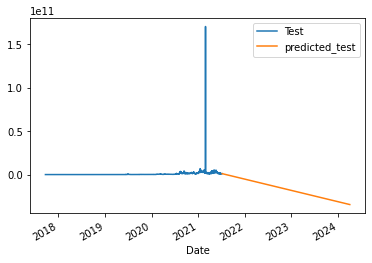

In [ ]:
df = pd.read_csv('coin_ChainLink.csv', parse_dates=['Date'])
df = df.drop(['SNo',	'Name',	'Symbol',	'High',	'Low'	,'Open',	'Close',	'Marketcap'], axis = 1)
df=df.groupby('Date').sum()
h_model=ExponentialSmoothing(df.Volume,trend='add', seasonal='add', seasonal_periods=80).fit()
predictions = h_model.forecast(steps =1000)
df['Volume'].plot(legend=True, label='Test')
predictions.plot(legend=True, label='predicted_test')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


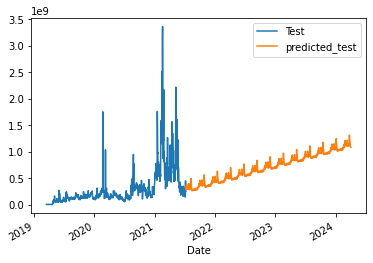

In [ ]:
df = pd.read_csv('coin_Cosmos.csv', parse_dates=['Date'])
df = df.drop(['SNo',	'Name',	'Symbol',	'High',	'Low'	,'Open',	'Close',	'Marketcap'], axis = 1)
df=df.groupby('Date').sum()
h_model=ExponentialSmoothing(df.Volume,trend='add', seasonal='add', seasonal_periods=80).fit()
predictions = h_model.forecast(steps =1000)
df['Volume'].plot(legend=True, label='Test')
predictions.plot(legend=True, label='predicted_test')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


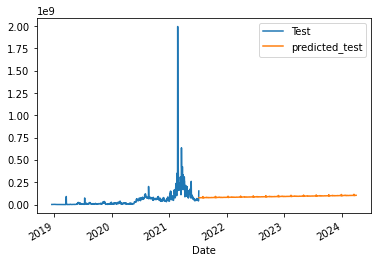

In [ ]:
df = pd.read_csv('coin_CryptocomCoin.csv', parse_dates=['Date'])
df = df.drop(['SNo',	'Name',	'Symbol',	'High',	'Low'	,'Open',	'Close',	'Marketcap'], axis = 1)
df=df.groupby('Date').sum()
h_model=ExponentialSmoothing(df.Volume,trend='add', seasonal='add', seasonal_periods=80).fit()
predictions = h_model.forecast(steps =1000)
df['Volume'].plot(legend=True, label='Test')
predictions.plot(legend=True, label='predicted_test')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


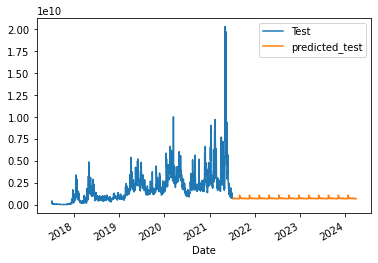

In [ ]:
df = pd.read_csv('coin_EOS.csv', parse_dates=['Date'])
df = df.drop(['SNo',	'Name',	'Symbol',	'High',	'Low'	,'Open',	'Close',	'Marketcap'], axis = 1)
df=df.groupby('Date').sum()
h_model=ExponentialSmoothing(df.Volume,trend='add', seasonal='add', seasonal_periods=80).fit()
predictions = h_model.forecast(steps =1000)
df['Volume'].plot(legend=True, label='Test')
predictions.plot(legend=True, label='predicted_test')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


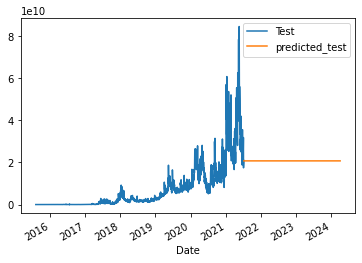

In [ ]:
df = pd.read_csv('coin_Ethereum.csv', parse_dates=['Date'])
df = df.drop(['SNo',	'Name',	'Symbol',	'High',	'Low'	,'Open',	'Close',	'Marketcap'], axis = 1)
df=df.groupby('Date').sum()
h_model=ExponentialSmoothing(df.Volume,trend='add', seasonal='add', seasonal_periods=80).fit()
predictions = h_model.forecast(steps =1000)
df['Volume'].plot(legend=True, label='Test')
predictions.plot(legend=True, label='predicted_test')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


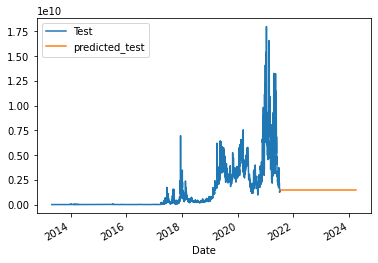

In [ ]:
df = pd.read_csv('coin_Litecoin.csv', parse_dates=['Date'])
df = df.drop(['SNo',	'Name',	'Symbol',	'High',	'Low'	,'Open',	'Close',	'Marketcap'], axis = 1)
df=df.groupby('Date').sum()
h_model=ExponentialSmoothing(df.Volume,trend='add', seasonal='add', seasonal_periods=80).fit()
predictions = h_model.forecast(steps =1000)
df['Volume'].plot(legend=True, label='Test')
predictions.plot(legend=True, label='predicted_test')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


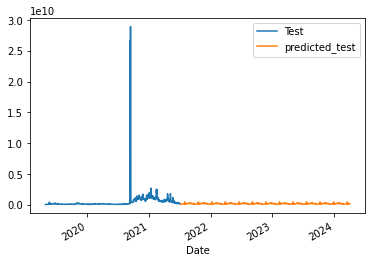

In [ ]:
df = pd.read_csv('coin_Monero.csv', parse_dates=['Date'])
df = df[-800:]

df = df.drop(['SNo',	'Name',	'Symbol',	'High',	'Low'	,'Open',	'Close',	'Marketcap'], axis = 1)
df=df.groupby('Date').sum()
h_model=ExponentialSmoothing(df.Volume,trend='add', seasonal='add', seasonal_periods=80).fit()
predictions = h_model.forecast(steps = 1000)
df['Volume'].plot(legend=True, label='Test')
predictions.plot(legend=True, label='predicted_test')

# print(df.info())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


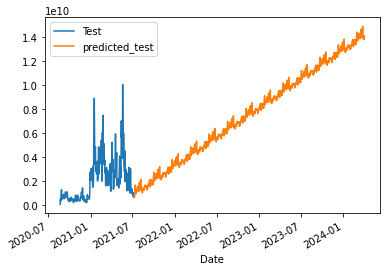

In [ ]:
df = pd.read_csv('coin_Polkadot.csv', parse_dates=['Date'])
df = df.drop(['SNo',	'Name',	'Symbol',	'High',	'Low'	,'Open',	'Close',	'Marketcap'], axis = 1)
df=df.groupby('Date').sum()
h_model=ExponentialSmoothing(df.Volume,trend='add', seasonal='add', seasonal_periods=80).fit()
predictions = h_model.forecast(steps =1000)
df['Volume'].plot(legend=True, label='Test')
predictions.plot(legend=True, label='predicted_test')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


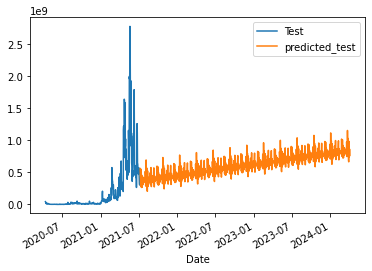

In [ ]:
df = pd.read_csv('coin_Solana.csv', parse_dates=['Date'])
df = df.drop(['SNo',	'Name',	'Symbol',	'High',	'Low'	,'Open',	'Close',	'Marketcap'], axis = 1)
df=df.groupby('Date').sum()
h_model=ExponentialSmoothing(df.Volume,trend='add', seasonal='add', seasonal_periods=80).fit()
predictions = h_model.forecast(steps =1000)
df['Volume'].plot(legend=True, label='Test')
predictions.plot(legend=True, label='predicted_test')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


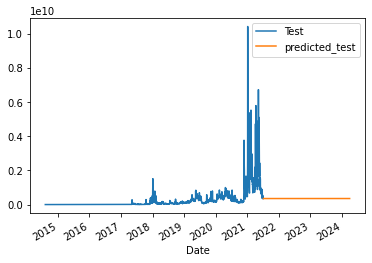

In [ ]:
df = pd.read_csv('coin_Stellar.csv', parse_dates=['Date'])
df = df.drop(['SNo',	'Name',	'Symbol',	'High',	'Low'	,'Open',	'Close',	'Marketcap'], axis = 1)
df=df.groupby('Date').sum()
h_model=ExponentialSmoothing(df.Volume,trend='add', seasonal='add', seasonal_periods=80).fit()
predictions = h_model.forecast(steps =1000)
df['Volume'].plot(legend=True, label='Test')
predictions.plot(legend=True, label='predicted_test')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


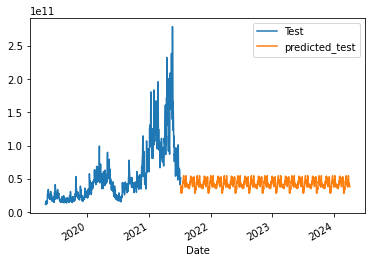

In [ ]:
df = pd.read_csv('coin_Tether.csv', parse_dates=['Date'])
df = df[-800:]

df = df.drop(['SNo',	'Name',	'Symbol',	'High',	'Low'	,'Open',	'Close',	'Marketcap'], axis = 1)
df=df.groupby('Date').sum()
h_model=ExponentialSmoothing(df.Volume,trend='add', seasonal='add', seasonal_periods=80).fit()
predictions = h_model.forecast(steps =1000)
df['Volume'].plot(legend=True, label='Test')
predictions.plot(legend=True, label='predicted_test')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


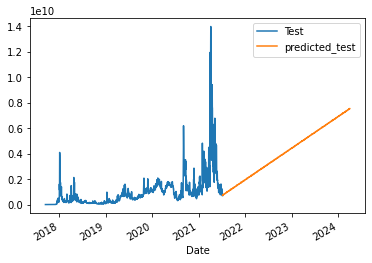

In [ ]:
df = pd.read_csv('coin_Tron.csv', parse_dates=['Date'])
df = df.drop(['SNo',	'Name',	'Symbol',	'High',	'Low'	,'Open',	'Close',	'Marketcap'], axis = 1)
df=df.groupby('Date').sum()
h_model=ExponentialSmoothing(df.Volume,trend='add', seasonal='add', seasonal_periods=80).fit()
predictions = h_model.forecast(steps =1000)
df['Volume'].plot(legend=True, label='Test')
predictions.plot(legend=True, label='predicted_test')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


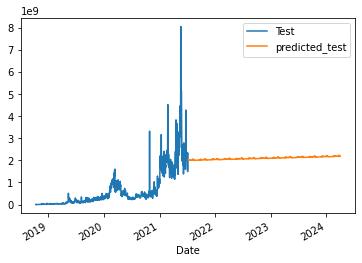

In [ ]:
df = pd.read_csv('coin_USDCoin.csv', parse_dates=['Date'])
df = df.drop(['SNo',	'Name',	'Symbol',	'High',	'Low'	,'Open',	'Close',	'Marketcap'], axis = 1)
df=df.groupby('Date').sum()
h_model=ExponentialSmoothing(df.Volume,trend='add', seasonal='add', seasonal_periods=80).fit()
predictions = h_model.forecast(steps =1000)
df['Volume'].plot(legend=True, label='Test')
predictions.plot(legend=True, label='predicted_test')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


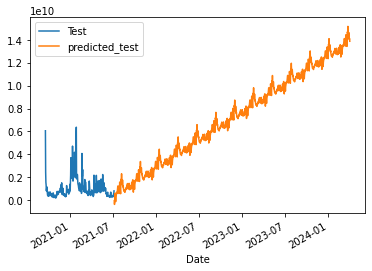

In [ ]:
df = pd.read_csv('coin_Uniswap.csv', parse_dates=['Date'])
df = df.drop(['SNo',	'Name',	'Symbol',	'High',	'Low'	,'Open',	'Close',	'Marketcap'], axis = 1)
df=df.groupby('Date').sum()
h_model=ExponentialSmoothing(df.Volume,trend='add', seasonal='add', seasonal_periods=80).fit()
predictions = h_model.forecast(steps =1000)
df['Volume'].plot(legend=True, label='Test')
predictions.plot(legend=True, label='predicted_test')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


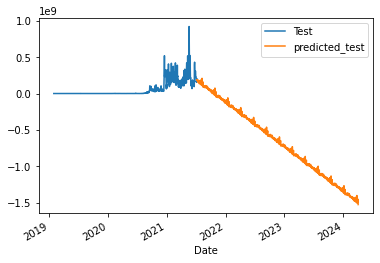

In [ ]:
df = pd.read_csv('coin_WrappedBitcoin.csv', parse_dates=['Date'])
df = df.drop(['SNo',	'Name',	'Symbol',	'High',	'Low'	,'Open',	'Close',	'Marketcap'], axis = 1)
df=df.groupby('Date').sum()
h_model=ExponentialSmoothing(df.Volume,trend='add', seasonal='add', seasonal_periods=80).fit()
predictions = h_model.forecast(steps =1000)
df['Volume'].plot(legend=True, label='Test')
predictions.plot(legend=True, label='predicted_test')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


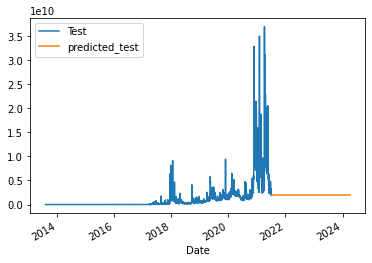

In [ ]:
df = pd.read_csv('coin_XRP.csv', parse_dates=['Date'])
df = df.drop(['SNo',	'Name',	'Symbol',	'High',	'Low'	,'Open',	'Close',	'Marketcap'], axis = 1)
df=df.groupby('Date').sum()
h_model=ExponentialSmoothing(df.Volume,trend='add', seasonal='add', seasonal_periods=80).fit()
predictions = h_model.forecast(steps =1000)
df['Volume'].plot(legend=True, label='Test')
predictions.plot(legend=True, label='predicted_test')